In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import visualkeras

c:\Users\TOSHIBA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Celsius vs Fahrenheit

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [3]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model_1.compile(loss= tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(0.1))

h = model_1.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

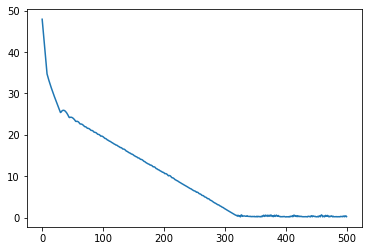

In [4]:
plt.plot(h.history['loss'])

In [5]:
visualkeras.layered_view(model_1)

# Images of clothing

In [8]:
import tensorflow_datasets as tfds

In [9]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [10]:
train, test = dataset['train'], dataset['test']

In [11]:
class_names = metadata.features['label'].names

In [18]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples

In [19]:
def normalizer(image, labels):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, labels

train = train.map(normalizer)
test = test.map(normalizer)

train = train.cache()
test = test.cache()

In [31]:
type(metadata)

tensorflow_datasets.core.dataset_info.DatasetInfo

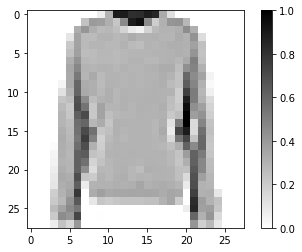

Pullover


In [23]:
for i, ii in train.take(1):
    break
i = i.numpy().reshape(28,28)

plt.figure()
plt.imshow(i, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[ii])

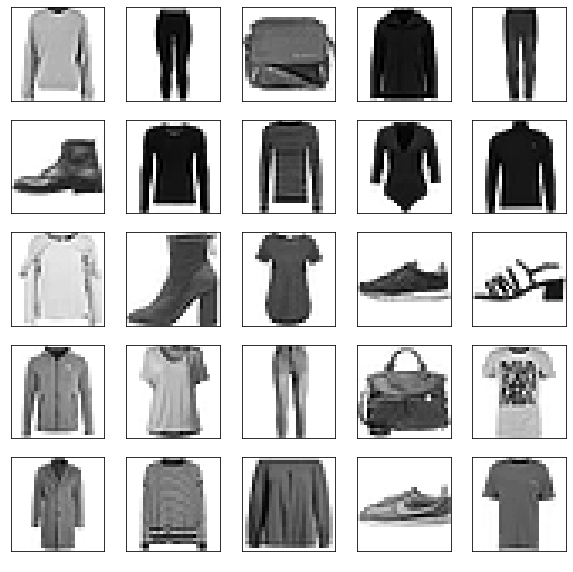

In [32]:

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train.take(25)):
    image = image.numpy().reshape(28,28)
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label], color="white")

In [33]:
BATCH_SIZE = 32
train = train.cache().repeat().shuffle(num_train).batch(BATCH_SIZE)
test = test.cache().batch(BATCH_SIZE)

In [37]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

h_2 = model_2.fit(train, epochs=5, steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4931 - accuracy: 0.8273
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3414 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8934


In [38]:
test_loss, test_accuracy = model_2.evaluate(test, steps=np.ceil(10000/32))

313/313 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8731


In [39]:
visualkeras.layered_view(model_2)

In [46]:
h_2.history

{'loss': [0.4931144118309021,
  0.37473127245903015,
  0.34139159321784973,
  0.31118401885032654,
  0.2915770411491394],
 'accuracy': [0.8273333311080933,
  0.8641666769981384,
  0.8751000165939331,
  0.8858333230018616,
  0.8933666944503784]}

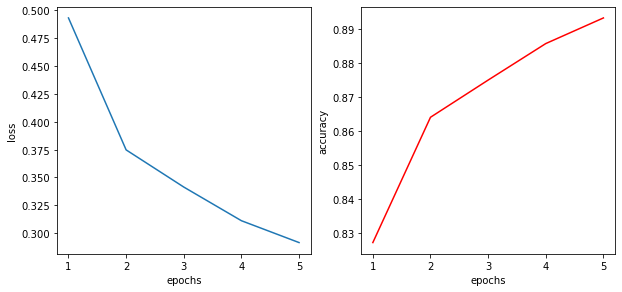

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot((1,2,3,4,5), h_2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,2,2)
plt.plot((1,2,3,4,5),h_2.history['accuracy'], color='r')
plt.ylabel('accuracy')
plt.xlabel('epochs');

## another way to load data

In [73]:
from tensorflow import keras

In [74]:
data = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = data.load_data()

# Convolutional Neural Network

In [85]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])



In [83]:
# train_x = train_x.reshape(60000,28,28,1)
train_x.shape

(60000, 28, 28)

In [77]:
train_y= train_y.reshape(-1,1)
train_y.shape

(60000, 1)

In [87]:
model_cnn.fit(train, epochs=5, steps_per_epoch=np.ceil(60000/32))

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3796 - accuracy: 0.8639
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2483 - accuracy: 0.9102
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2125 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1774 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1523 - accuracy: 0.9440


# 4

In [ ]:
import cv2
from scipy import misc

In [ ]:
i = misc.ascent()

In [ ]:
plt.figure(figsize=(15,12))
plt.gray()
plt.grid(False)
plt.imshow(i)
plt.xticks([])
plt.yticks([]);